In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Learning Rate

In [23]:
alh_lr_df = pd.read_csv("alh_lr_losses.csv")
a40_lr_df = pd.read_csv("a40_lr_losses.csv")

alh_lr_df.drop(index=alh_lr_df[alh_lr_df['lr'] > 0.0005].index, inplace=True)
a40_lr_df.drop(index=a40_lr_df[a40_lr_df['lr'] > 0.001].index, inplace=True)

alh_lr_values = alh_lr_df['lr'].unique()
a40_lr_values = a40_lr_df['lr'].unique()

In [24]:
print(alh_lr_df['lr'].unique())
print(a40_lr_df['lr'].unique())

[1.0000e-05 1.7783e-05 3.1623e-05 5.6234e-05 1.0000e-04 1.7783e-04
 3.1623e-04]
[1.0000e-05 1.9307e-05 3.7276e-05 7.1969e-05 1.3895e-04 2.6827e-04
 5.1795e-04 1.0000e-03]


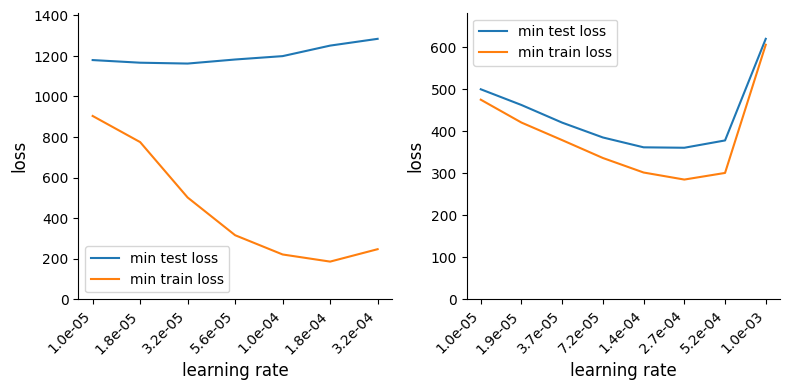

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

fontsize=12

def plot_lr(ax, lr_df):
    lr_values = lr_df['lr'].unique()
    x = np.arange(len(lr_values))


    ax.plot(x, lr_df.groupby('lr')['test_loss'].min(), label='min test loss')
    ax.plot(x, lr_df.groupby('lr')['loss'].min(), label='min train loss')
    ax.set_xticks(x, [f"{v:.1e}" for v in lr_values], rotation=45, ha='right')
    ax.spines[["top", "right"]].set_visible(False)
    ax.legend()
    ax.set_ylabel("loss", fontsize=fontsize)
    ax.set_xlabel("learning rate", fontsize=fontsize)

    ax.set_ylim([0, lr_df.groupby('lr')['test_loss'].min().max() * 1.1])

plot_lr(ax1, alh_lr_df)
plot_lr(ax2, a40_lr_df)

fig.tight_layout()

fig.savefig("lr_single.png", dpi=600)

# Batch size

In [41]:
alh_bs_df = pd.read_csv("alh_bs_losses.csv")
a40_bs_df = pd.read_csv("a40_bs_losses.csv")

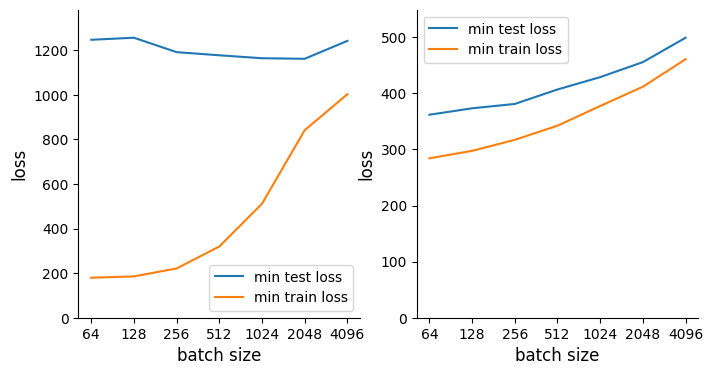

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

def plot_bs(ax, bs_df):
    bs_x = np.arange(bs_df["batch_size"].nunique())
    ax.plot(bs_x, bs_df.groupby("batch_size")['test_loss'].min().values, label="min test loss")
    ax.plot(bs_x, bs_df.groupby("batch_size")['loss'].min().values, label='min train loss')

    ax.set_xlabel("batch size", fontsize=fontsize)
    ax.set_ylabel("loss", fontsize=fontsize)

    ax.set_xticks(bs_x, list(bs_df["batch_size"].unique()))

    ax.legend()

    ax.set_ylim([0,  bs_df.groupby("batch_size")['test_loss'].min().max() * 1.1])

    ax.spines[["top", "right"]].set_visible(False)

plot_bs(ax1, alh_bs_df)
plot_bs(ax2, a40_bs_df)

# Batch size & Learning rate

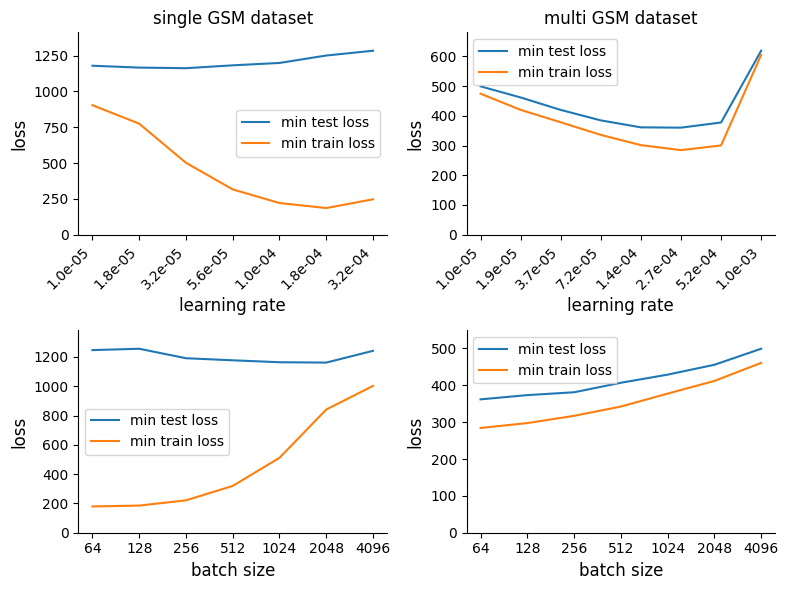

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

plot_lr(ax1, alh_lr_df)
plot_lr(ax2, a40_lr_df)


plot_bs(ax3, alh_bs_df)
plot_bs(ax4, a40_bs_df)


ax1.set_title("single GSM dataset")
ax2.set_title("multi GSM dataset")

fig.tight_layout()

fig.savefig("lr_bs_comparison.png", dpi=600)

# Epochs

In [8]:
a4l_df = pd.read_csv("a4l_losses.csv")
a4l_df['epoch'] = a4l_df['epoch'].map(lambda x:  x // 8)

a4l_df

,epoch,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,test_loss,test_reconstruction_loss,test_divergence_loss,test_stoicheometry_loss,epochs,...,test_dataset,test_size,save_test_min,weight_decay,beta_S,use_beta_S_in_test_loss,test_beta_S,main_folder,losses_file,run
0,0,1173.902854,1147.537423,26.365431,0.0,1189.456385,1163.019462,26.436922,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
1,0,875.755120,846.815902,28.939218,0.0,896.214498,867.337529,28.876969,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
2,0,753.499399,726.144153,27.355244,0.0,781.259859,754.040817,27.219044,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
3,0,686.192690,659.250533,26.942160,0.0,716.100106,689.264354,26.835750,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
4,0,638.414028,611.840203,26.573825,0.0,668.611216,642.078203,26.533013,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,31,305.314826,278.936282,26.378544,0.0,382.143965,356.377319,25.766645,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
252,31,304.593082,278.199974,26.393107,0.0,382.238674,356.456237,25.782438,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
253,31,304.167208,277.775550,26.391657,0.0,382.283796,356.501862,25.781934,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0
254,31,303.187583,276.761368,26.426214,0.0,382.415311,356.603207,25.812103,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,False,0.0,./data/models/agren_40_long/,./data/models/agren_40_long/losses.csv,0


In [14]:
alhl_df = pd.read_csv("alhl_losses.csv")

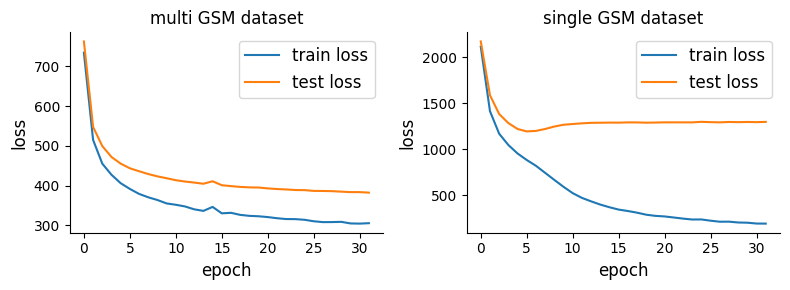

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))

def plot_a4l_e(ax):
    ax.plot(a4l_df.groupby("epoch")['loss'].mean(), label="train loss")
    ax.plot(a4l_df.groupby("epoch")['test_loss'].mean(), label="test loss")

    ax.set_ylabel("loss", fontsize=fontsize)
    ax.set_xlabel("epoch", fontsize=fontsize)

    ax.spines[["top", "right"]].set_visible(False)

    ax.legend(fontsize=fontsize)

def plot_alhl_e(ax):
    ax.plot(alhl_df.groupby("epoch")['loss'].mean(), label="train loss")
    ax.plot(alhl_df.groupby("epoch")['test_loss'].mean(), label="test loss")

    ax.set_ylabel("loss", fontsize=fontsize)
    ax.set_xlabel("epoch", fontsize=fontsize)

    ax.spines[["top", "right"]].set_visible(False)

    ax.legend(fontsize=fontsize)
    
plot_a4l_e(ax1)
plot_alhl_e(ax2)

ax1.set_title("multi GSM dataset")
ax2.set_title("single GSM dataset")

fig.tight_layout()

fig.savefig("epoch_single_multi_comp.png", dpi=600)